## **Importing Necessary Libraries**

In [258]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from sklearn.preprocessing import StandardScaler

## **Importing Data**

In [ ]:
Life_Expectancy_Data = pd.read_csv('Life Expectancy Data.csv')
Life_Expectancy_Data

Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2938 rows x 22 columns]

## **Initial Analysis**

In [ ]:
Life_Expectancy_Data.shape

(2938, 22)

In [ ]:
Life_Expectancy_Data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
Life_Expectancy_Data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
Life_Expectancy_Data.describe(include = 'all')

Country         Year  ... Income composition of resources    Schooling
count          2938  2938.000000  ...                     2771.000000  2775.000000
unique          193          NaN  ...                             NaN          NaN
top     Afghanistan          NaN  ...                             NaN          NaN
freq             16          NaN  ...                             NaN          NaN
mean            NaN  2007.518720  ...                        0.627551    11.992793
std             NaN     4.613841  ...                        0.210904     3.358920
min             NaN  2000.000000  ...                        0.000000     0.000000
25%             NaN  2004.000000  ...                        0.493000    10.100000
50%             NaN  2008.000000  ...                        0.677000    12.300000
75%             NaN  2012.000000  ...                        0.779000    14.300000
max             NaN  2015.000000  ...                        0.948000    20.700000

[11 rows x 22 columns]

In [ ]:
Life_Expectancy_Data['Country'].nunique()

193

In [ ]:
pd.crosstab(index =Life_Expectancy_Data['Country'], columns = Life_Expectancy_Data['Year'], values=Life_Expectancy_Data['infant deaths'], rownames=None, colnames=None,aggfunc= 'mean',dropna=False)

Year                                2000  2001  2002  ...  2013  2014  2015
Country                                               ...                  
Afghanistan                         88.0  88.0  88.0  ...  66.0  64.0  62.0
Albania                              1.0   1.0   1.0  ...   0.0   0.0   0.0
Algeria                             21.0  20.0  20.0  ...  21.0  21.0  21.0
Angola                              97.0  97.0  96.0  ...  69.0  67.0  66.0
Antigua and Barbuda                  0.0   0.0   0.0  ...   0.0   0.0   0.0
...                                  ...   ...   ...  ...   ...   ...   ...
Venezuela (Bolivarian Republic of)  11.0  10.0  10.0  ...   9.0   9.0   9.0
Viet Nam                            33.0  32.0  30.0  ...  28.0  28.0  28.0
Yemen                               48.0  46.0  45.0  ...  36.0  37.0  37.0
Zambia                              44.0  43.0  41.0  ...  29.0  28.0  27.0
Zimbabwe                            24.0  25.0  25.0  ...  25.0  23.0  22.0

[193 rows x 16 columns]

In [ ]:
pd.crosstab(index =Life_Expectancy_Data['Country'], columns = Life_Expectancy_Data['Year'], values=Life_Expectancy_Data['Life expectancy '], rownames=None, colnames=None,aggfunc= 'mean',dropna=False)

Year                                2000  2001  2002  ...  2013  2014  2015
Country                                               ...                  
Afghanistan                         54.8  55.3  56.2  ...  59.9  59.9  65.0
Albania                             72.6  73.6  73.3  ...  77.2  77.5  77.8
Algeria                             71.3  71.4  71.6  ...  75.3  75.4  75.6
Angola                              45.3  45.7  46.5  ...  51.1  51.7  52.4
Antigua and Barbuda                 73.6  73.8  74.0  ...  76.1  76.2  76.4
...                                  ...   ...   ...  ...   ...   ...   ...
Venezuela (Bolivarian Republic of)  72.5  72.5  73.1  ...  73.8  73.9  74.1
Viet Nam                            73.4  73.6  73.8  ...  75.7  75.9  76.0
Yemen                               68.0  61.1  61.5  ...  65.4  65.4  65.7
Zambia                              43.8  44.6  45.5  ...  63.0  61.1  61.8
Zimbabwe                            46.0  45.3  44.8  ...  58.0  59.2  67.0

[193 rows x 16 columns]

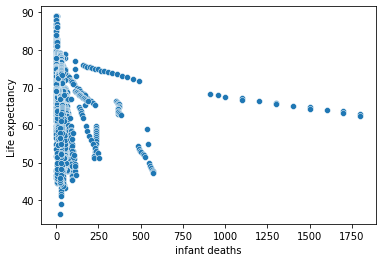

In [ ]:
sns.scatterplot(x=Life_Expectancy_Data['infant deaths'], y=Life_Expectancy_Data['Life expectancy '])

In [ ]:
Life_Expectancy_Data['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

## **Data Cleaning**

There are lot of Nan values in the dataset, So we going to fill with mean values

In [ ]:
Life_Expectancy_Data['Population'] = Life_Expectancy_Data['Population'].fillna(value= 12753380,axis = 0)
Life_Expectancy_Data['GDP'] = Life_Expectancy_Data['GDP'].fillna(value= 7483.158469,axis = 0)
Life_Expectancy_Data['Hepatitis B'] = Life_Expectancy_Data['Hepatitis B'].fillna(value= 80.940461,axis = 0)
Life_Expectancy_Data['Total expenditure'] = Life_Expectancy_Data['Total expenditure'].fillna(value= 5.93819,axis = 0)

In [ ]:
Life_Expectancy_Data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                    0
Diphtheria                          19
 HIV/AIDS                            0
GDP                                  0
Population                           0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
Life_Expectancy_Data = Life_Expectancy_Data.dropna(axis = 0)

In [ ]:
Life_Expectancy_Data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
Life_Expectancy_Data.shape

(2562, 22)

In [ ]:
Life_Expectancy_Data.corr()

Year  ...  Schooling
Year                             1.000000  ...   0.208940
Life expectancy                  0.165633  ...   0.757073
Adult Mortality                 -0.076166  ...  -0.444687
infant deaths                   -0.036093  ...  -0.204352
Alcohol                         -0.052902  ...   0.546310
percentage expenditure           0.081145  ...   0.419187
Hepatitis B                      0.101648  ...   0.167606
Measles                         -0.097403  ...  -0.152969
 BMI                             0.091450  ...   0.567814
under-five deaths               -0.040533  ...  -0.219783
Polio                            0.096118  ...   0.415509
Total expenditure                0.083602  ...   0.268700
Diphtheria                       0.151688  ...   0.422706
 HIV/AIDS                       -0.129351  ...  -0.230372
GDP                              0.113682  ...   0.444641
Population                       0.018895  ...  -0.036699
 thinness  1-19 years           -0.036948  ...  -0.484022
 thinness 5-9 years             -0.041965  ...  -0.472403
Income composition of resources  0.234296  ...   0.781893
Schooling                        0.208940  ...   1.000000

[20 rows x 20 columns]

In [ ]:
Life_Expectancy_Data['Life expectancy '] = Life_Expectancy_Data['Life expectancy '].astype(dtype = 'int')

In [ ]:
Life_Expectancy_Data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                      int64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [ ]:
Life_Expectancy_Data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
Life_Expectancy_Data = Life_Expectancy_Data.rename({'Life expectancy ':'Life_exp'},axis = 1)


In [ ]:
Life_Expectancy_Data

Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2562 rows x 22 columns]

## **Assumption Check**

#### **1. Check Linearity**

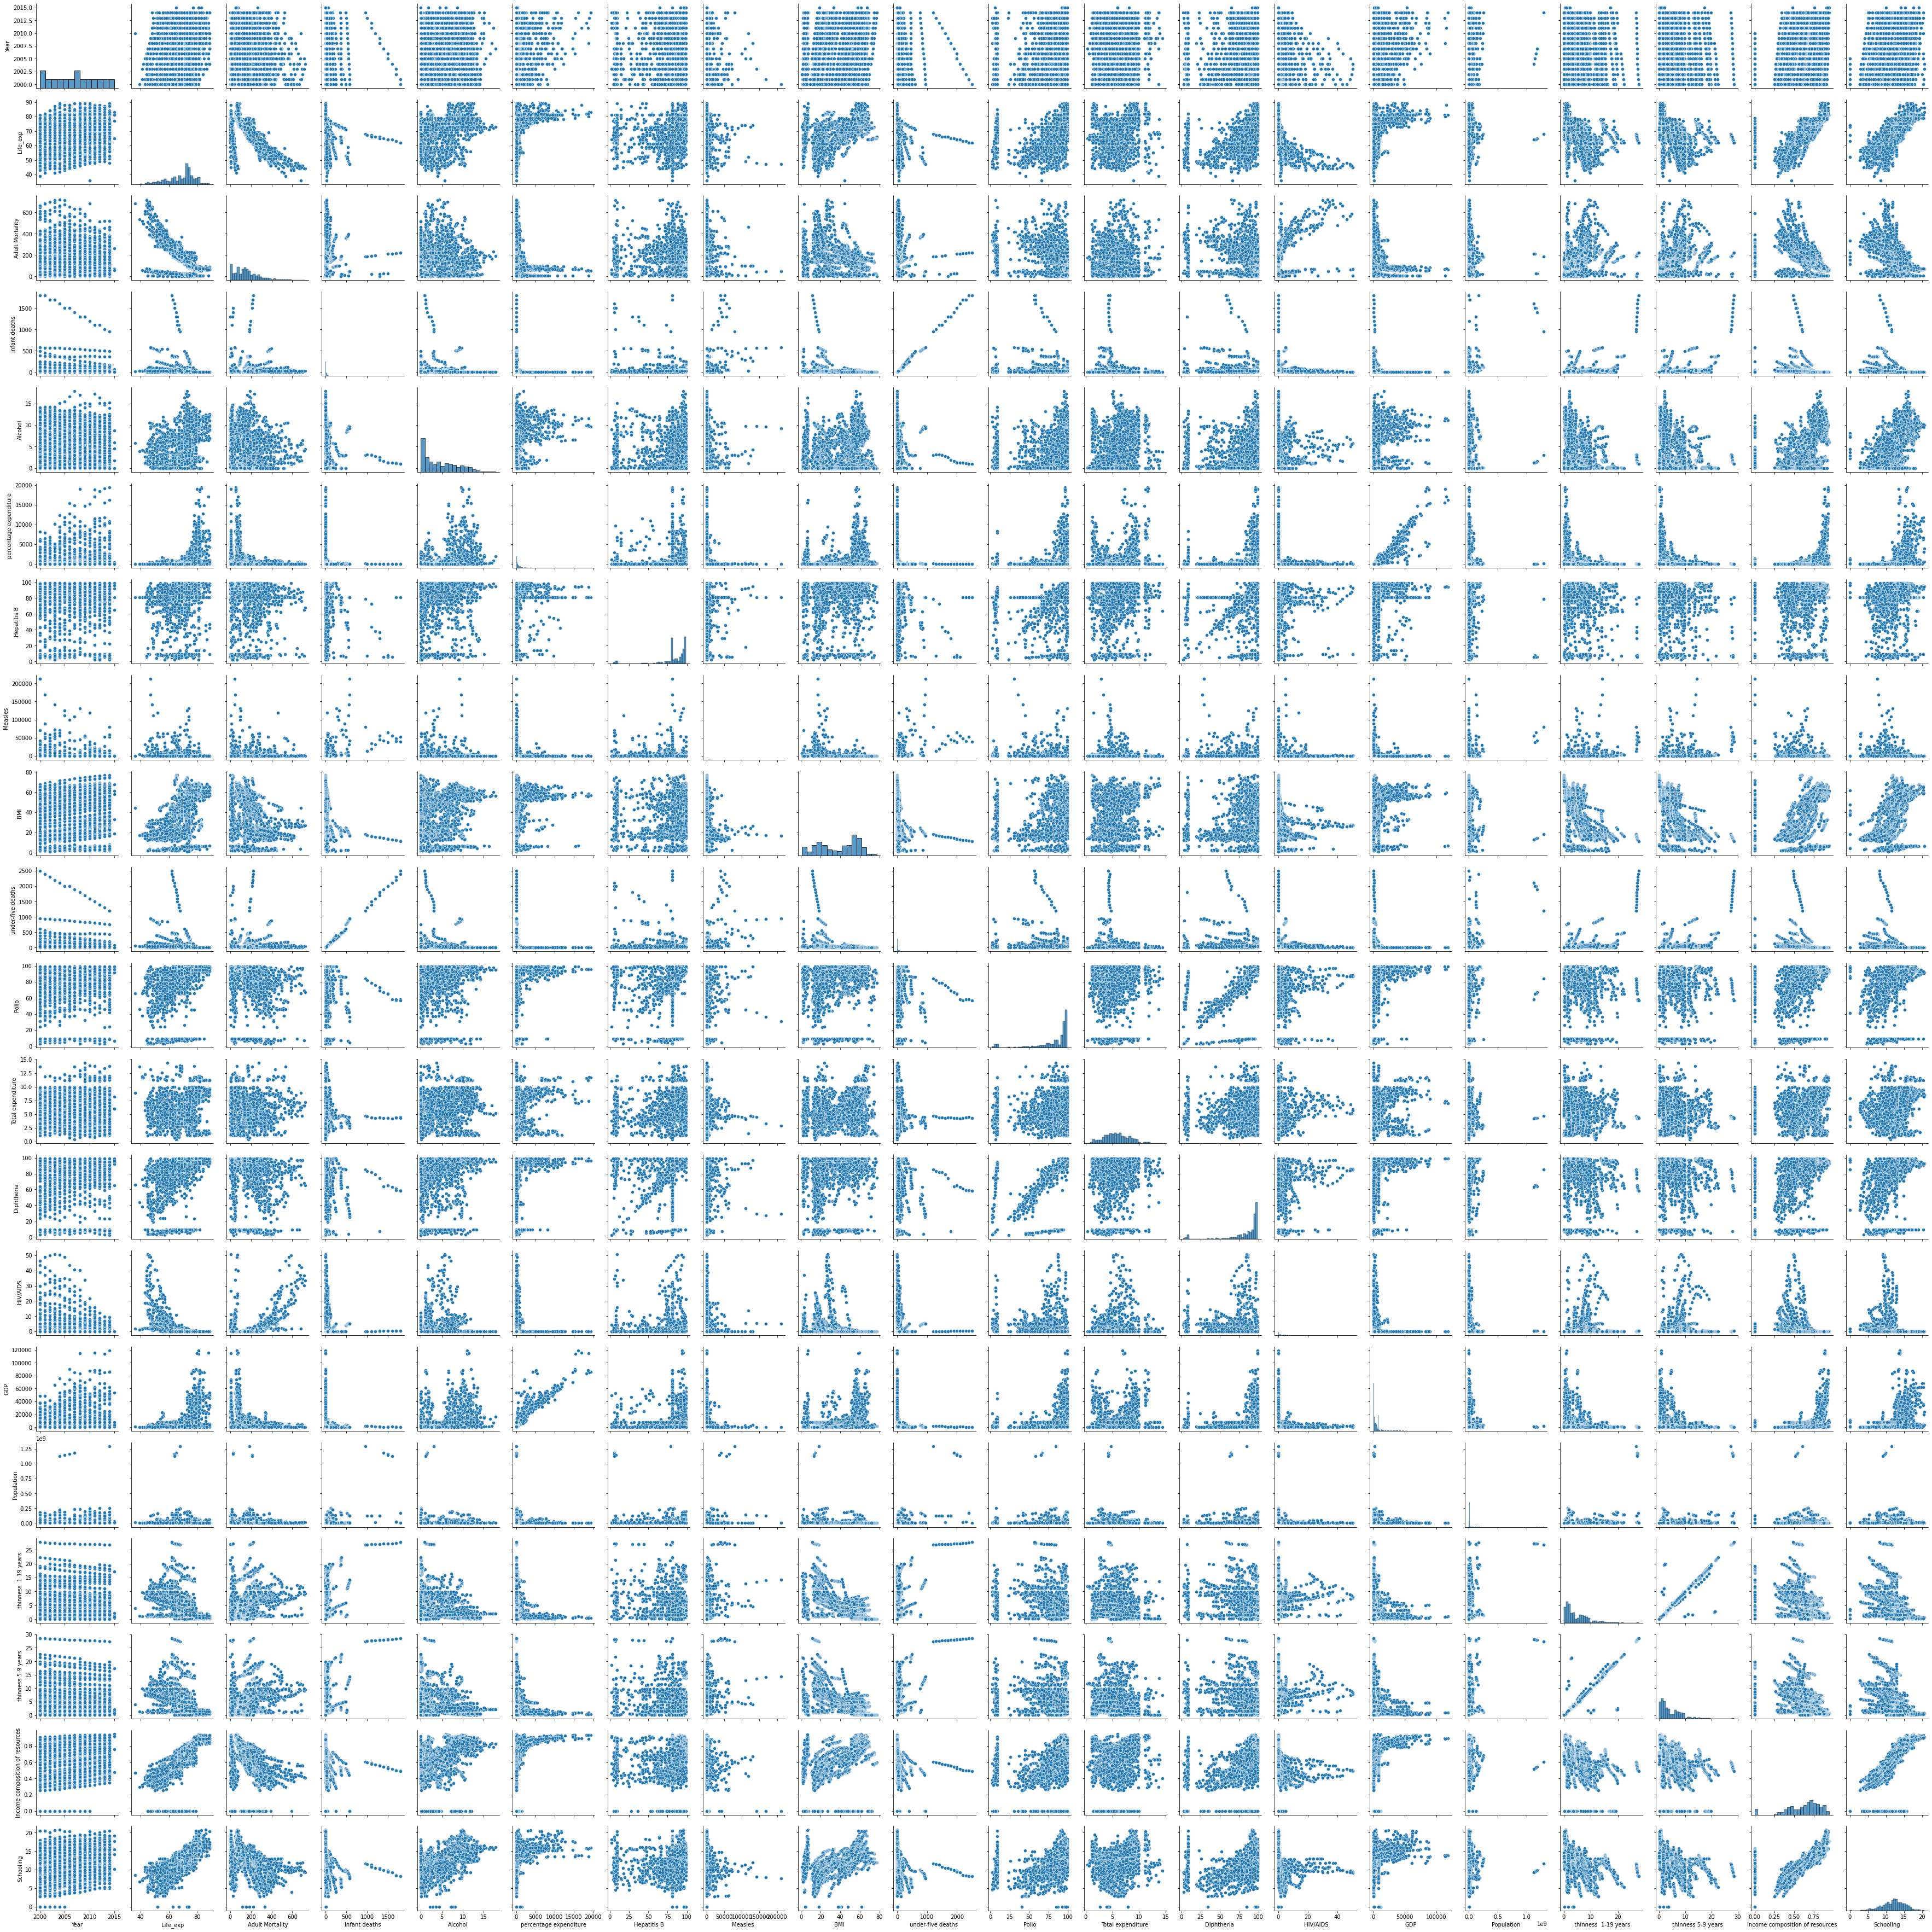

In [ ]:
sns.pairplot(Life_Expectancy_Data)

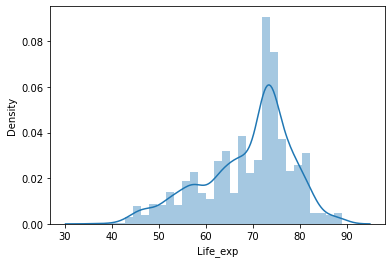

In [ ]:
sns.distplot(Life_Expectancy_Data['Life_exp'])
plt.show()

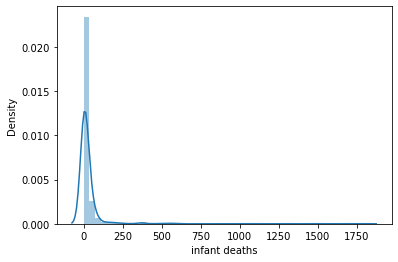

In [ ]:
sns.distplot(Life_Expectancy_Data['infant deaths'])
plt.show()

#### **2. No Multicollinearity**

In [252]:
corr_matrix = Life_Expectancy_Data.corr()
corr_matrix

Year  ...  Schooling
Year                             1.000000  ...   0.208940
Life_exp                         0.165114  ...   0.755729
Adult Mortality                 -0.076166  ...  -0.444687
infant deaths                   -0.036093  ...  -0.204352
Alcohol                         -0.052902  ...   0.546310
percentage expenditure           0.081145  ...   0.419187
Hepatitis B                      0.101648  ...   0.167606
Measles                         -0.097403  ...  -0.152969
 BMI                             0.091450  ...   0.567814
under-five deaths               -0.040533  ...  -0.219783
Polio                            0.096118  ...   0.415509
Total expenditure                0.083602  ...   0.268700
Diphtheria                       0.151688  ...   0.422706
 HIV/AIDS                       -0.129351  ...  -0.230372
GDP                              0.113682  ...   0.444641
Population                       0.018895  ...  -0.036699
 thinness  1-19 years           -0.036948  ...  -0.484022
 thinness 5-9 years             -0.041965  ...  -0.472403
Income composition of resources  0.234296  ...   0.781893
Schooling                        0.208940  ...   1.000000

[20 rows x 20 columns]

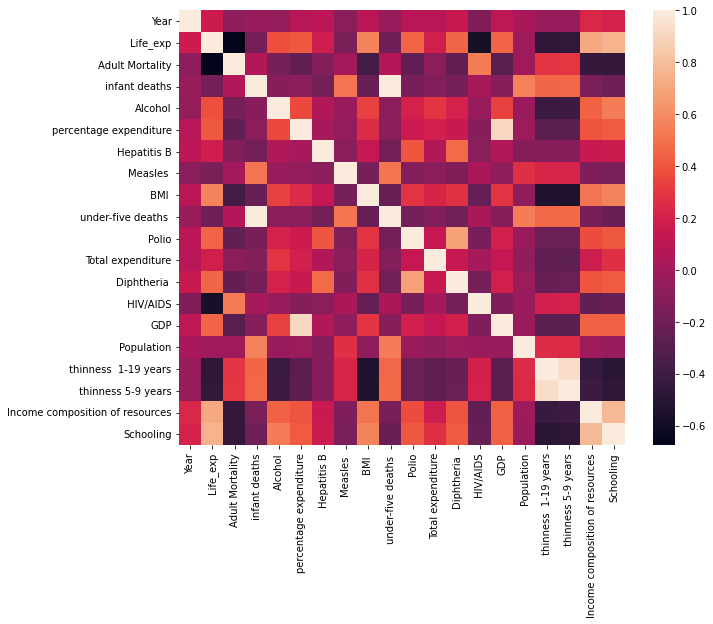

In [257]:
plt.figure(figsize=(10,8), dpi=None, facecolor=None)
sns.heatmap(corr_matrix)
plt.show()

Assumptions satisfied

#### **3. Auto Regression** - It's satisfied

#### **4. Homoscedasticity** - It can be check during model building

#### **5. Zero Residual Mean** - It can also be check during model building

## **Model Building**

In [ ]:
Encoded_data = pd.get_dummies(Life_Expectancy_Data)
Encoded_data

Year  Life_exp  ...  Status_Developed  Status_Developing
0     2015        65  ...                 0                  1
1     2014        59  ...                 0                  1
2     2013        59  ...                 0                  1
3     2012        59  ...                 0                  1
4     2011        59  ...                 0                  1
...    ...       ...  ...               ...                ...
2933  2004        44  ...                 0                  1
2934  2003        44  ...                 0                  1
2935  2002        44  ...                 0                  1
2936  2001        45  ...                 0                  1
2937  2000        46  ...                 0                  1

[2562 rows x 193 columns]

In [ ]:
x = Encoded_data.drop(labels='Life_exp', axis=1)
y = Encoded_data[['Life_exp']]

In [ ]:
x

Year  Adult Mortality  ...  Status_Developed  Status_Developing
0     2015            263.0  ...                 0                  1
1     2014            271.0  ...                 0                  1
2     2013            268.0  ...                 0                  1
3     2012            272.0  ...                 0                  1
4     2011            275.0  ...                 0                  1
...    ...              ...  ...               ...                ...
2933  2004            723.0  ...                 0                  1
2934  2003            715.0  ...                 0                  1
2935  2002             73.0  ...                 0                  1
2936  2001            686.0  ...                 0                  1
2937  2000            665.0  ...                 0                  1

[2562 rows x 192 columns]

In [ ]:
y

Life_exp
0           65
1           59
2           59
3           59
4           59
...        ...
2933        44
2934        44
2935        44
2936        45
2937        46

[2562 rows x 1 columns]

In [262]:
scale = StandardScaler()
Scaled_X = scale.fit_transform(x)

In [263]:
x_train,x_test,y_train,y_test = train_test_split(Scaled_X,y,test_size = 0.20,random_state = 12)

In [264]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2049, 192), (513, 192), (2049, 1), (513, 1))

## **Model Training**

In [265]:
Linear_Model = LinearRegression()
Linear_Model.fit(x_train,y_train)

LinearRegression()

## **Model Testing**

In [266]:
y_test

Life_exp
1736        75
2481        69
524         45
70          75
1825        64
...        ...
2620        58
2495        52
2001        72
2120        74
1693        75

[513 rows x 1 columns]

In [267]:
y_train_pred = Linear_Model.predict(x_train)
y_train_pred

array([[74.95609402],
       [80.56253933],
       [76.91019558],
       ...,
       [54.31449246],
       [71.26322292],
       [78.94339871]])

In [268]:
y_test_pred = Linear_Model.predict(x_test)
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.astype(dtype = 'int')

0
0    74
1    70
2    45
3    76
4    65
..   ..
508  58
509  52
510  72
511  76
512  74

[513 rows x 1 columns]

##**Model Evaluation**

In [269]:
error = y_test.values - y_test_pred.values
error

array([[ 5.54648169e-01],
       [-1.16654324e+00],
       [-2.54299560e-02],
       [-1.22367214e+00],
       [-1.26468777e+00],
       [-4.70254175e-01],
       [-7.76517605e+00],
       [-7.83730737e-01],
       [-1.52005886e+00],
       [-8.97011987e-01],
       [-4.88674560e-02],
       [ 1.11470676e+00],
       [ 4.09762940e-02],
       [ 2.98287083e+00],
       [-1.61722683e+00],
       [-2.15237060e-02],
       [-1.54300808e+00],
       [-1.32962917e+00],
       [-2.15371362e-01],
       [-6.89492456e-01],
       [-2.32425808e+00],
       [-1.06644558e+00],
       [ 6.01802708e+00],
       [-9.69277612e-01],
       [ 1.29292942e+00],
       [-1.53359644e-01],
       [ 2.11386450e-01],
       [ 1.73788794e-01],
       [-1.93460964e+00],
       [-4.22171902e+00],
       [ 7.03573950e-01],
       [ 7.20175513e-01],
       [-1.95072292e+00],
       [-2.42435574e+00],
       [-7.13906519e-01],
       [ 2.13827856e-01],
       [ 3.41269263e-01],
       [ 5.76132544e-01],
       [ 2.2

In [270]:
mean_squared_error(y_test,y_test_pred)

3.8412187705581395

In [271]:
r2_score(y_test,y_test_pred) # 95% Accuracy

0.9564355128427549